In [ ]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn
from torch.nn import functional as F
import torchaudio
from torchaudio import datasets
import torchtext
from torchaudio.utils import download_asset

import os
import time
from tqdm import tqdm
import IPython.display as ipd

In [ ]:
!pip install lightning

In [ ]:
import lightning as L

In [ ]:
import sys
LIB_PATH = '/content/drive/MyDrive/GSC/GSC_helper'

sys.path.append(LIB_PATH)
from MDTC import MDTC
from GSC_zip import unzipzip, zipzip
from GSC import download_GSC

## Download Data

### None Augmentation MFCC
Using for none-aug experiment and online-aug experiment

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-ihU00J3iBw0bLe3rZtDH6ymacKVBIQK/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-I7D09WWsJAd0R8WAwHzRtS11Ft1ZlCQ/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

### Offline
One for all


In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-9DXrkWnlSBBxRb3XYLBqhQYH37DdwV6/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1JSrw7pJzkTdx4LCVV9IQlQfZqCXMLbCp/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

### Plus with other augmentations (no using mul-factor)

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-0FwqLvAb69npc7DxSJVsxm6zaDmaTj_/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/18jFIhlDSAyDp5a0NgUIQvXy7TykCyLEG/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

### Plus with other augmentations (using mul-factor = 2)

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-Q2jLkxkO-ZrsDWrtFovrBtIOxdfaga2/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-AUHnuVsFy93DrKsof_OagAdPa35GKun/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1-Q2jLkxkO-ZrsDWrtFovrBtIOxdfaga2
From (redirected): https://drive.google.com/uc?id=1-Q2jLkxkO-ZrsDWrtFovrBtIOxdfaga2&confirm=t&uuid=2ffcf6d8-7b95-4137-836f-03bb0992fa26
To: /content/GSC_12_MFCC/train.zip
100%|██████████| 5.14G/5.14G [01:42<00:00, 50.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h
From (redirected): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h&confirm=t&uuid=6af37e3f-8278-49fb-b327-16d6d6b3af39
To: /content/GSC_12_MFCC/val.zip
100%|██████████| 297M/297M [00:08<00:00, 35.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb
From (redirected): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb&confirm=t&uuid=3c74cb9a-cbfd-43a7-b264-b1be24860502
To: /content/GSC_12_MFCC/test.zip
100%|██████████| 146M/146M [00:02<00:00, 49.8MB/s]
Downloading...
From: https://drive.google.co

## Dataset

In [ ]:
TRAIN_TRANSFORM = torchaudio.transforms.SpecAugment(n_time_masks = 2,
                                      time_mask_param = 20,
                                      n_freq_masks = 2,
                                      freq_mask_param = 40)

In [ ]:
class GSC(torch.utils.data.Dataset):
    def __init__(self, root, subset = 'train', zip_map = None, csv_map = None, unzip = True):
        super().__init__()
        local_path = os.path.join(root, subset)
        self.root = root
        if not os.path.exists(local_path):
            os.mkdir(local_path)
            unzipzip(zip_map[subset], local_path)
        if unzip:
            unzipzip(zip_map[subset], local_path)
        self.csv = pd.read_csv(csv_map[subset])
        self.subset = subset

    def __getitem__(self, idx):
        row = self.csv.iloc[idx]
        spec = np.load(os.path.join(self.root, row['link']))['arr_0']
        spec = torch.from_numpy(spec).unsqueeze(0)
        if self.subset == 'train':
            spec = TRAIN_TRANSFORM(spec)
        return spec, row['label']

    def __len__(self):
        return len(self.csv)

In [ ]:
class SC_12(L.LightningDataModule):
    def __init__(self, root, batch_size, zip_map, csv_map):
        super().__init__()
        self.root = root
        self.batch_size = batch_size
        self.train_dataset = GSC(root,
                                 subset = 'train',
                                 zip_map = zip_map,
                                 csv_map = csv_map,
                                 unzip = False)
        self.val_dataset = GSC(root,
                               subset = 'val',
                               zip_map = zip_map,
                               csv_map = csv_map,
                               unzip = False)
        self.test_dataset = GSC(root,
                                subset = 'test',
                                zip_map = zip_map,
                                csv_map = csv_map,
                                unzip = False)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = True,
    #                                       collate_fn = self.collate_fn,
    #                                       num_workers = 1,
    #                                       prefetch_factor = 1,
                                           pin_memory = True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
     #                                      collate_fn = self.collate_fn,
     #                                      num_workers = 1,
     #                                      prefetch_factor = 1,
                                           pin_memory = True)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
      #                                     collate_fn = self.collate_fn,
      #                                     num_workers = 1,
                                           prefetch_factor = 1)

In [ ]:
data_12 = SC_12('/content/GSC_12_MFCC', 128, ZIP_MAP, CSV_MAP)

Extracted /content/GSC_12_MFCC/train.zip
Extracted /content/GSC_12_MFCC/val.zip
Extracted /content/GSC_12_MFCC/test.zip


In [ ]:
X, y = next(iter(data_12.train_dataloader()))
X.shape

torch.Size([128, 1, 80, 101])

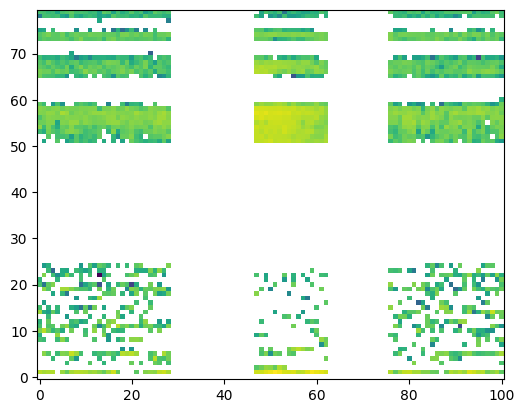

In [ ]:
plt.imshow(X[1,:,:,:].squeeze().log(), origin = 'lower')

## Model

In [ ]:
class MDTC_training(L.LightningModule):
    def __init__(self, lr, in_channels, num_classes, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #self.automatic_optimization = False
        self.lr = lr
        self.linear = nn.Linear(in_channels, 64)
        self.net = MDTC(in_channels = 64,
             out_channels = 64,
             kernel_size = 5,
             stack_num = 4,
             stack_size = 4,
             classification = True,
             hidden_size = 64,
             num_classes = num_classes,
             dropout = 0.5)

    def forward(self, input):
        input = self.linear(input.squeeze().transpose(1, 2))
        return self.net(input.transpose(1, 2))

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

net = MDTC_training(lr = 0.001, in_channels = 80, num_classes = 12)
summary(net, input_size = (128, 1, 80, 101))

Layer (type:depth-idx)                             Output Shape              Param #
MDTC_training                                      [128, 12]                 --
├─Linear: 1-1                                      [128, 101, 64]            5,184
├─MDTC: 1-2                                        [128, 12]                 --
│    └─DTCBlock: 2-1                               [128, 64, 101]            --
│    │    └─CausalConv1d: 3-1                      [128, 64, 101]            384
│    │    └─BatchNorm1d: 3-2                       [128, 64, 101]            128
│    │    └─Conv1d: 3-3                            [128, 64, 101]            4,160
│    │    └─BatchNorm1d: 3-4                       [128, 64, 101]            128
│    │    └─ReLU: 3-5                              [128, 64, 101]            --
│    │    └─Conv1d: 3-6                            [128, 64, 101]            4,160
│    │    └─BatchNorm1d: 3-7                       [128, 64, 101]            128
│    │    └─ReLU: 3-8 

In [ ]:
@add_to_class(MDTC_training)
def accuracy(self, Y_hat, Y, averaged = True):
    """
    Compute the number of correct predictions
    """
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(dim = 1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

@add_to_class(MDTC_training)
def training_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)

    # single scheduler
    # sch = self.lr_schedulers()
    #sch.step()
    torch.nn.utils.clip_grad_norm(self.parameters(), 5)

    values = {"train_loss": loss, "train_acc": acc}
    self.log_dict(values, prog_bar = True)
    return loss

@add_to_class(MDTC_training)
def validation_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)
    values = {"val_loss": loss, "val_acc": acc}
    self.log_dict(values, prog_bar = True)
    return values

@add_to_class(MDTC_training)
def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), self.lr, weight_decay = 0.00005)
    #lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.8)
    #return [optimizer], [lr_scheduler]
    return optimizer

#@add_to_class(MDTC_training)
#def lr_schedulers(self):
#    lr_scheduler = torch.optim.lr_scheduler.StepLR(self.configure_optimizers(), step_size = 3, gamma = 0.8)
#    return lr_scheduler

#@add_to_class(MDTC_training)
#def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_closure):
    # update params
#    optimizer.step(closure = optimizer_closure)

    # manually warm up lr withou a scheduler
#    if self.trainer.global_step < 2000:
#        lr_scale = self.trainer.global_step/2000
#    else:
#        lr_scale = (2000/self.trainer.global_step)**0.5

#    for pg in optimizer.param_groups:
#        pg['lr'] = lr_scale*self.lr

In [ ]:
@add_to_class(MDTC_training)
def loss(self, y_hat, y):
    return F.cross_entropy(y_hat, y, reduction = 'mean')

In [ ]:
data_12 = SC_12('/content/GSC_12_MFCC', 128, ZIP_MAP, CSV_MAP)

In [ ]:
data_12 = SC_12('/content/GSC_12_MFCC', 512, ZIP_MAP, CSV_MAP)

In [ ]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
early_stopping_callback = EarlyStopping(monitor = "val_acc", min_delta = 0.0001, patience = 5, mode = "max")
checkpoint_callback = ModelCheckpoint(dirpath = '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model_noise2',
                                      save_top_k = 5, monitor = 'val_acc',
                                      mode = 'max',
                                      filename = 'mdtc-gsc-12-{epoch:02d}-{val_loss:.2f}-{val_acc:.4f}')
lr_monitor = LearningRateMonitor(logging_interval='step')

## Noise, but extra data (using mul-factor)

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/MFCC/logging_noise2",
                    max_epochs=100)
trainer.fit(net, data_12)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type   | Params
----------------------------------
0 | linear | Linear | 5.2 K 
1 | net    | MDTC   | 159 K 
----------------------------------
164 K     Trainable params
0         Non-trainable params
164 K     Total params
0.658     Total estimated model params size (MB)
IN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

<ipython-input-13-43079dd52795>:21: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Noise, but no extra data (no using mul-factor)

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/MFCC/logging",
                    max_epochs=100)
trainer.fit(net, data_12, ckpt_path = '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model/mdtc-gsc-12-epoch=34-val_loss=0.14-val_acc=0.9595.ckpt')

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory /content/drive/MyDrive/GSC_ckpt/MFCC/best_model exists and is not empty.
INFO: Restoring states from the checkpoint path at /content/drive/MyDrive/GSC_ckpt/MFCC/best_model/mdtc-gsc-12-epoch=34-val_loss=0.14-val_acc=0.9595.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path a

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

<ipython-input-13-43079dd52795>:21: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Online

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/mdtc1",
                    max_epochs=100)
trainer.fit(net, data_12)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type   | Params
----------------------------------
0 | linear | Linear | 5.2 K 
1 | net    | MDTC   | 159 K 
----------------------------------
164 K     Trainable params
0         Non-trainable params
164 K     Total params
0.658     Total estimated model params size (MB)
IN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

<ipython-input-12-43079dd52795>:21: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

### Offline

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/mdtc1",
                    max_epochs=100)
trainer.fit(net, data_12)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type   | Params
----------------------------------
0 | linear | Linear | 5.2 K 
1 | net    | MDTC   | 159 K 
----------------------------------
164 K     Trainable params
0         Non-trainable params
164 K     Total params
0.658     Total estimated model params size (MB)
IN

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

<ipython-input-11-43079dd52795>:21: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), 5)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
zipzip('/content/best_model', '/content/drive/MyDrive/KWS/Process/MDTC/best_model_onfly.zip')

zipping...: 100%|██████████| 5/5 [00:00<00:00, 61.95it/s]

/content/drive/MyDrive/KWS/Process/MDTC/best_model_onfly.zip created


In [ ]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

In [ ]:
losses = []
accs = []
epochs = []
for summary in summary_iterator("/content/mdtc1/lightning_logs/version_0/events.out.tfevents.1710942302.83bc5cce5f93.436.0"):
    ss = summary.summary.value
    for s in ss:
      if s.tag == 'train_loss':
          losses.append(s.simple_value)
      if s.tag == 'epochs':
          epochs.append(s.simple_value)
      if s.tag == 'val_acc':
          accs.append(s.simple_value)

In [ ]:
epochs

[]

In [ ]:
max(accs)

0.9558503031730652